<a href="https://colab.research.google.com/github/itissandeep98/ML-Assignments/blob/master/Assignment2/ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import h5py 
import numpy as np
import pandas as pd
from math import pi,exp,sqrt
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn import metrics 
from sklearn.manifold import TSNE
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression

## Pre Processing

In [179]:
class MyPreProcessor():
  """
  My steps for pre-processing for the three datasets.
  """

  def __init__(self):
    pass

  def pre_process(self, dataset):
    """
    Reading the file and preprocessing the input and output.
    Note that you will encode any string value and/or remove empty entries in this function only.
    Further any pre processing steps have to be performed in this function too. 

    Parameters
    ----------

    dataset : integer with acceptable values 0, 1, or 2
    0 ->  Dataset
    1 ->  Dataset
    2 ->  Dataset

    Returns
    -------
    X : 2-dimensional numpy array of shape (n_samples, n_features)
    y : 1-dimensional numpy array of shape (n_samples,)
    """
    scaler = StandardScaler()
    if dataset == 0:
      df=h5py.File("/content/drive/My Drive/part_A_train.h5", "r")
      X=np.array(df['X'])
      y=np.array(df['Y'])
      X = scaler.fit_transform(X)
    
    elif dataset == 1:
      df=h5py.File("/content/drive/My Drive/part_B_train.h5", "r")
      X=np.array(df['X'])
      y=np.array(df['Y'])

    elif dataset == 2:
      df=pd.read_csv("/content/drive/My Drive/weight-height.csv")
      df['Gender'].replace('Male',0,inplace=True)
      df['Gender'].replace('Female',1,inplace=True)
      df['Height'],df['Weight']=df['Weight'].copy(),df['Height'].copy()
      df=df.sample(frac=1,random_state=4)
     
      X=df['Height'].to_numpy()
      X=np.reshape(X,(X.shape[0],1))
      y=df['Weight'].to_numpy()
    
    return X, y

## Q1

In [6]:
def analysis(X_train, X_test, y_train, y_test):
  logistic = LogisticRegression(max_iter=10000)
  logistic.fit(X_train,y_train)
  y_pred=logistic.predict(X_test)

  print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

  tsne = TSNE(n_components=2, verbose=2, n_iter=1000)
  tsne_results = tsne.fit_transform(X_train)

  plt.figure(figsize=(16,10))
  sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=y_train,
    palette=sns.color_palette("hls", 10),
    legend="full"
  )

In [7]:
def convert_n_to_1(mat):
  z=np.zeros((mat.shape[0]))
  for i in range(10):
    z[mat[:,i]==1]=i
  z=z.astype(int)
  return z

In [8]:
preprocessor = MyPreProcessor()
X, y = preprocessor.pre_process(0)
y=convert_n_to_1(y)
print(X.shape,y.shape)

(4200, 784) (4200,)


### d)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20)
freq = np.bincount(y_train)
items = np.nonzero(freq)[0]
print("size:",y_train.shape[0])
print(*list(zip(items,freq[items]))) 
freq = np.bincount(y_test)
items = np.nonzero(freq)[0]
print("size:",y_test.shape[0])
print(*list(zip(items,freq[items]))) 

size: 3360
(0, 320) (1, 395) (2, 314) (3, 339) (4, 333) (5, 319) (6, 353) (7, 345) (8, 328) (9, 314)
size: 840
(0, 80) (1, 99) (2, 79) (3, 85) (4, 83) (5, 79) (6, 88) (7, 86) (8, 82) (9, 79)


### e)

Accuracy: 0.8809523809523809
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3360 samples in 0.021s...
[t-SNE] Computed neighbors for 3360 samples in 1.226s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3360
[t-SNE] Computed conditional probabilities for sample 2000 / 3360
[t-SNE] Computed conditional probabilities for sample 3000 / 3360
[t-SNE] Computed conditional probabilities for sample 3360 / 3360
[t-SNE] Mean sigma: 4.477732
[t-SNE] Computed conditional probabilities in 0.221s
[t-SNE] Iteration 50: error = 84.1490173, gradient norm = 0.0032750 (50 iterations in 2.169s)
[t-SNE] Iteration 100: error = 78.8525772, gradient norm = 0.0047320 (50 iterations in 1.799s)
[t-SNE] Iteration 150: error = 78.7048340, gradient norm = 0.0002388 (50 iterations in 1.460s)
[t-SNE] Iteration 200: error = 78.7025299, gradient norm = 0.0000550 (50 iterations in 1.486s)
[t-SNE] Iteration 250: error = 78.7023315, gradient norm = 0.0000848 (50 iterations in 1.470s)
[t-SNE] KL

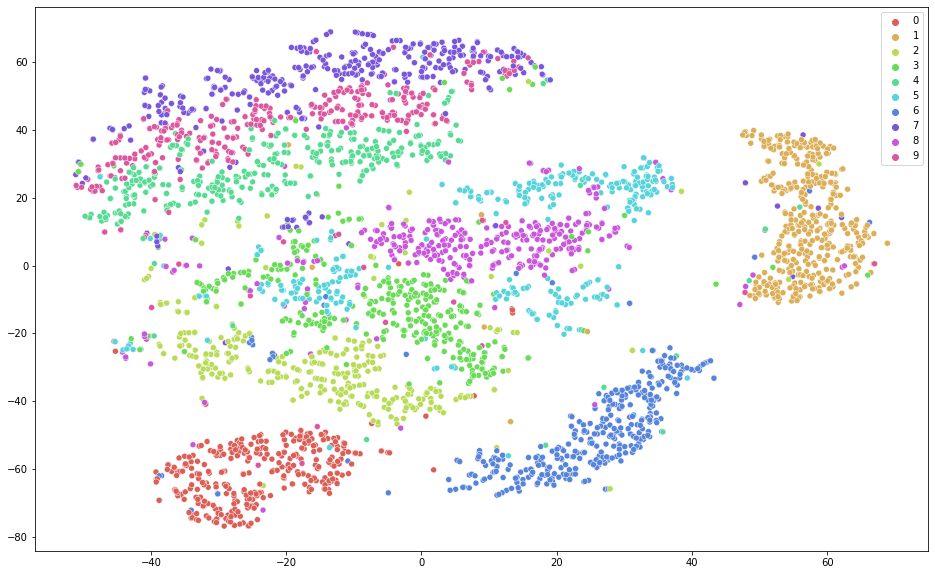

In [10]:
pca = PCA(n_components=50) 
X_train_pca = pca.fit_transform(X_train) 
X_test_pca = pca.transform(X_test) 
analysis(X_train_pca, X_test_pca, y_train, y_test)

### f)

Accuracy: 0.875
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3360 samples in 0.020s...
[t-SNE] Computed neighbors for 3360 samples in 1.219s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3360
[t-SNE] Computed conditional probabilities for sample 2000 / 3360
[t-SNE] Computed conditional probabilities for sample 3000 / 3360
[t-SNE] Computed conditional probabilities for sample 3360 / 3360
[t-SNE] Mean sigma: 4.492668
[t-SNE] Computed conditional probabilities in 0.207s
[t-SNE] Iteration 50: error = 84.0811996, gradient norm = 0.0044050 (50 iterations in 1.875s)
[t-SNE] Iteration 100: error = 79.0926743, gradient norm = 0.0077058 (50 iterations in 1.881s)
[t-SNE] Iteration 150: error = 78.7014313, gradient norm = 0.0005150 (50 iterations in 1.360s)
[t-SNE] Iteration 200: error = 78.6940460, gradient norm = 0.0001478 (50 iterations in 1.330s)
[t-SNE] Iteration 250: error = 78.6935425, gradient norm = 0.0001252 (50 iterations in 1.373s)
[t-SNE] KL divergence a

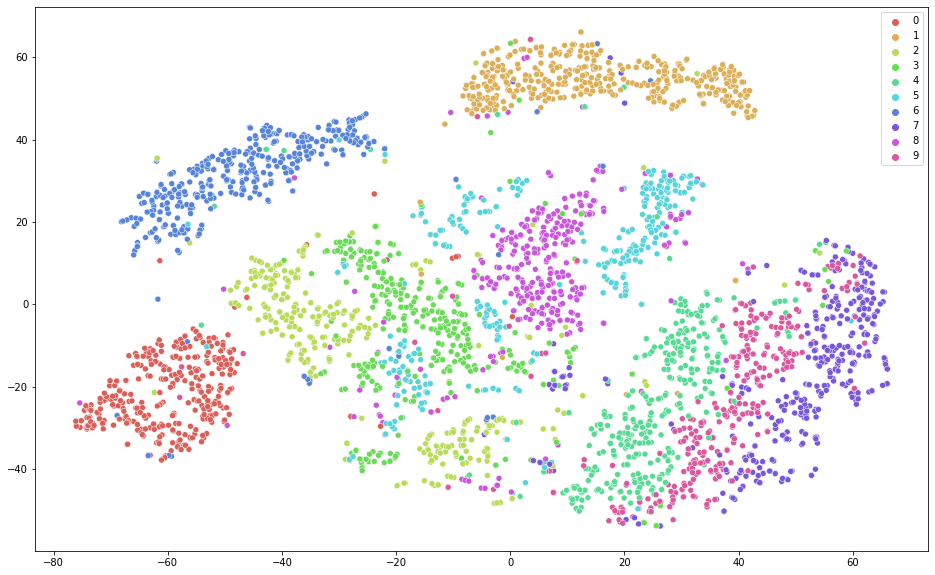

In [11]:
svd = TruncatedSVD(n_components=50)
X_train_svd=svd.fit_transform(X_train)
X_test_svd=svd.transform(X_test)
analysis(X_train_svd, X_test_svd, y_train, y_test)

## Q2

In [80]:
def create_sample(X_train,y_train):
  y=np.array([])
  X=np.array([])
  
  for i in range(y_train.shape[0]):
    idx=np.random.randint(0,y_train.shape[0])
    X=np.append(X,X_train[idx])
    y=np.append(y,y_train[idx])
  X=X.reshape((X.shape[0],1))
  return X,y


In [135]:
preprocessor= MyPreProcessor()
X,y=preprocessor.pre_process(2)
B=100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

predictions=None
for _ in range(B):
  X_temp,y_temp=create_sample(X_train,y_train)

  linear=LinearRegression()
  linear.fit(X_temp,y_temp)

  temp=X_test.dot(linear.coef_)+linear.intercept_
  temp=temp.reshape((temp.shape[0],1))

  if(predictions is not None):
    predictions=np.concatenate((predictions,temp),axis=1)
  else:
    predictions=temp
  
avg_pred=np.mean(predictions,axis=1)
diff=avg_pred-y_test

bias=np.sum(abs(diff))/X_test.shape[0]

avg=avg_pred.reshape((avg_pred.shape[0],1))
variance=np.sqrt((1/(B-1))*np.sum((predictions-avg)**2,axis=1))
variance=np.sum(variance)/X_test.shape[0]

y_test=y_test.reshape((y_test.shape[0],1))
MSE=(1/B)*np.sum((predictions-y_test)**2,axis=1)
MSE=np.sum(MSE)/X_test.shape[0]

print("Bias:",bias)
print("Variance:",variance)
print("MSE:",MSE)
print(MSE-bias**2-variance)

Bias: 1.1834619405934745
Variance: 0.021053881432780024
MSE: 2.134092469220897
0.7124564229548446


## Q4

### SKlearn

In [14]:
preprocessor = MyPreProcessor()
X, y = preprocessor.pre_process(0)
y=convert_n_to_1(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test) 
metrics.accuracy_score(y_test, y_pred)

0.6452380952380953

### Custom

In [229]:
class NaiveBayes():
  def __init__(self):
    pass

  def calculateStats(self,X,size):
    stats = np.array([[np.mean(col), np.var(col),X.shape[0]/size] for col in zip(*X)])
    return stats

  def separateByClass(self,X,y):
    separated={}
    for i in range(X.shape[0]):
      if(y[i] in separated):
        separated[y[i]]=np.concatenate([separated[y[i]],[X[i]]])
      else:
        separated[y[i]]=[X[i]]
    
    return separated

  def fit(self,X,y):
      separated= self.separateByClass(X,y)
      self.stats={}
      for label in separated:
        self.stats[label]=self.calculateStats(separated[label],X.shape[0])
        
      return self.stats

  def calculateGaussian(self,x, mean, var):
    if(var<10**-7):
      return 0
    exponent = -((x-mean)**2 / (2 * var ))
    return np.log((1 / np.sqrt(2 * pi * var))) + exponent

  
  def calculateClassProbability(self,X):
    probabilities={}
    for label in self.stats:
      probabilities[label]=0
      for col in range(X.shape[0]):
        mean,var,_=self.stats[label][col]
        probabilities[label]+=self.calculateGaussian(X[col],mean,var)
        # assert probabilities[label]!=float("-inf"),"data:"+str(mean)+" "+str(var) +" col:"+str(col)

    return probabilities


  def getPrediction(self,X):
    bestlabel=0
    max_prob=float("-inf")
    probabilities=self.calculateClassProbability(X)
    # print(probabilities)
    for label in probabilities:
      if(max_prob<probabilities[label]):
        max_prob=probabilities[label]
        bestlabel=label
    return bestlabel


  def predict(self,X):
    y=np.array([])
    for i in range(X.shape[0]):
      yi=self.getPrediction(X[i])
      y=np.append(y,yi)
    y=y.astype(int)
    return y
    

In [232]:
preprocessor = MyPreProcessor()
X, y = preprocessor.pre_process(0)
y=convert_n_to_1(y)
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.1) 
nb=NaiveBayes()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
# print(y_pred)
# print(y_test)
metrics.accuracy_score(y_test,y_pred)

0.7333333333333333